In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [13]:
df = pd.read_csv('data/CollegeMsgClusteredFull.csv')

In [14]:
import networkx as nx

def create_graph_for_bucket(bucket_id):
    # Filter data for specific bucket
    bucket_data = df[df['bucket_id'] == bucket_id]
    
    # Create a directed graph
    G = nx.DiGraph()
    
    for _, row in bucket_data.iterrows():
        src = row['src_id']
        dst = row['dst_id']
        G.add_node(src, cluster=row['src_cluster'])
        G.add_node(dst, cluster=row['dst_cluster'])
        G.add_edge(src, dst)
    
    return G

graphs = {bucket_id: create_graph_for_bucket(bucket_id) for bucket_id in df['bucket_id'].unique()}


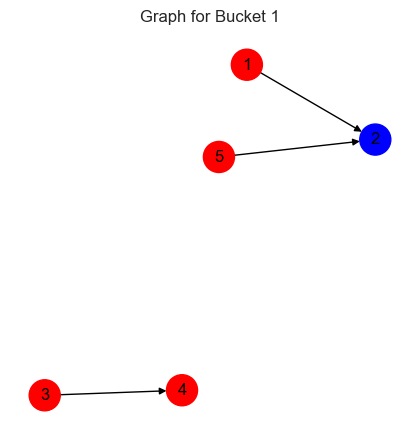

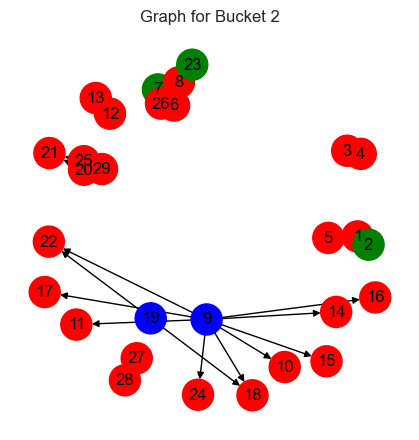

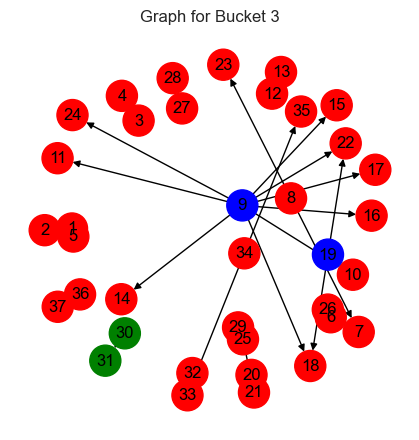

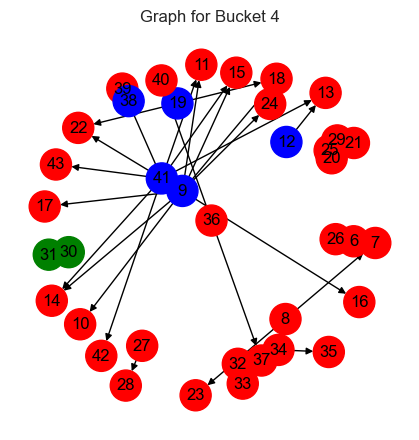

In [15]:
for bucket_id, graph in graphs.items():
    if bucket_id == 5:
        break
    plt.figure(figsize=(4, 4))
    pos = nx.spring_layout(graph)
    
    # Define colors for each cluster
    color_map = {0: 'red', 1: 'blue', 2: 'green'}
    
    # Get node colors based on their cluster
    node_colors = [color_map[data['cluster']] for _, data in graph.nodes(data=True)]
    
    nx.draw(graph, pos, with_labels=True, node_size=500, node_color=node_colors)
    
    plt.title(f"Graph for Bucket {bucket_id}")
    plt.show()

In [ ]:
# for bucket_id, graph in graphs.items():
#     print(graph.nodes)

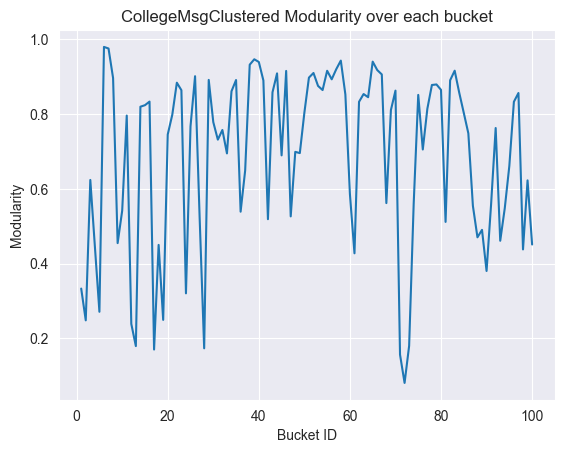

In [11]:
mod_df = pd.read_csv('data/college_modularities.csv')

# Plotting
plt.plot(mod_df['bucket_id'], mod_df['modularity'])
plt.xlabel('Bucket ID')
plt.ylabel('Modularity')
plt.title('CollegeMsgClustered Modularity over each bucket')
plt.grid(True)
plt.show()